## 1.[enumerate](#1)
## 2.[lambda](#2)
## 3.[pandas](#3)
## 4.[numpy](#4)
## 5.[markdown](#5)
## 6.[pytorch](#6)
## L.[其他操作](#last)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot
from colorama import Fore, Back

## <span id ="1">1.enumerate</span>

In [2]:
#枚举
LL = ['a','b','c']
aa =  enumerate(LL)
print(aa, type(aa))

<enumerate object at 0x7f233fcc11b0> <class 'enumerate'>


In [3]:
for i ,e in enumerate(LL):
    print(i,e)

0 a
1 b
2 c


In [4]:
for e in enumerate(LL,3):
    print(e)

(3, 'a')
(4, 'b')
(5, 'c')


## <span id ="2">2.lambda</span>

* 快速构建函数

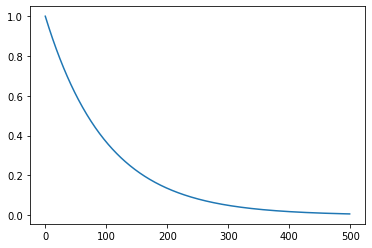

In [5]:
epsilon_by_frame = lambda frame_idx:math.exp(-frame_idx/100)
plt.plot([epsilon_by_frame(i) for i in range(500)])

* 多返回值

In [6]:
multi_return_value = lambda a, b :(a+1,b+2)
a, b =multi_return_value(1,1)
print(a,b)

2 3


* 和map连用快速定义并返回

In [7]:
L = [1,2,3,4]
list(map(lambda x : x**3, L))

[1, 8, 27, 64]

* 和filter连用进行数据的挑选

In [8]:
list(filter(lambda x: x>=2, L))

[2, 3, 4]

## <span id ="3">3.pandas</span>

* pd.qcut根据值均匀分配将数据分为n个梯度

In [9]:
pd.qcut(range(6),3)

[(-0.001, 1.667], (-0.001, 1.667], (1.667, 3.333], (1.667, 3.333], (3.333, 5.0], (3.333, 5.0]]
Categories (3, interval[float64]): [(-0.001, 1.667] < (1.667, 3.333] < (3.333, 5.0]]

In [10]:
pd.qcut(range(5), 3, labels=["good", "medium", "bad"])

[good, good, medium, bad, bad]
Categories (3, object): [good < medium < bad]

## <span id ="4">4.numpy</span>

* np.random.choice进行选择

In [11]:
# np.random.choice(a,size=None,replace=True,p=None)
# a:一维数组(表示在其中选一个)或者int数(表示在[0,i-1]中选一个)
# size:int数代表一维数组，也可返回指定大小的多维矩阵
# replace=True 表示可能会返回重复的项
# p:对a中的每个数设置权重，即被选中的概率
print(np.random.choice(range(6)))
print(np.random.choice(["a","b","c","d"]))
print(np.random.choice(["a","b","c","d"],p = [0,1,0,0]))

3
c
b


* 图片的numpy和torch.Tensor之间的转化要用到transpose()函数<br>
    对于numpy 的图片:H x W x C<br>
    对于$\;$torch$\;$ 的图片:C x H x W

## <span id = "5">5.markdown</span>

$${\max_{a'}}$$

## <span id='6'>6.pytorch</span>

* pytorch 使用 **(a)** torch.tensor.item()和 **(b)** torch.tensor.cpu().numpy()的异同<br>
    同 : 都是将tensor张量转化为python标量值<br>
    异 : (a)只能对单个张量操作 | (b)既可以对单个张量操作也可以对进行数组操作

In [12]:
test = torch.tensor(5)
print("test :", test)
print(".item() :", test.item())
print(".cpu().numpy() :", test.cpu().numpy())

test : tensor(5)
.item() : 5
.cpu().numpy() : 5


In [13]:
test = torch.tensor([1,2])
print("test :", test)
print(".cpu().numpy() :",test.cpu().numpy())
print("")
try:
    print(".item() :", test.item())
except ValueError :
    print(Fore.WHITE + Back.RED + "ValueError: only one element tensors can be converted to Python scalars")

test : tensor([1, 2])
.cpu().numpy() : [1 2]

ValueError: only one element tensors can be converted to Python scalars


* torchviz画图<br>
该包有两个方法,make_dot_from_trace和make_dot。感觉我只用到了第一个<br>
其中，make_dot(model).render("picture")保存的是pdf文档<br>
make_dot(model).render("picture", format="png")保存的是png格式图片和图片信息文件

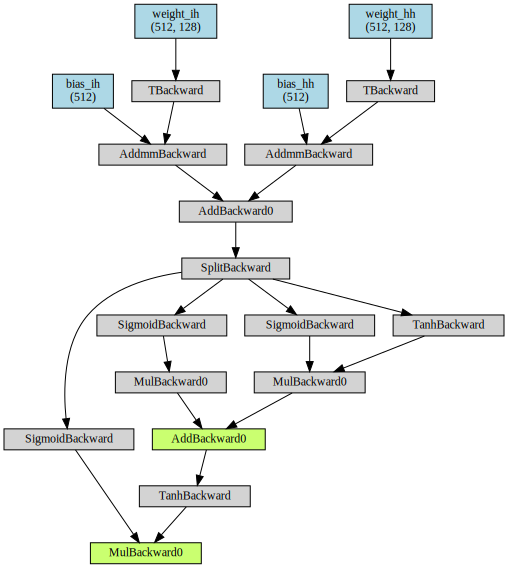

In [14]:
lstm_cell = torch.nn.LSTMCell(128, 128)
x = torch.randn(3, 128)
make_dot(lstm_cell(x), params=dict(list(lstm_cell.named_parameters())))

* 理解.detach()<br>
    1. 简单理解为该tensor的复制，且require_grad = False
    2. 通常我们使用到model里输出的量是require_grad = True的，也就是说其包含原始梯度，而这时我们又需要用其计算Loss，此时便需要重置其梯度，使其不受原始梯度的影响。所以.detach()也就起到了重置梯度的作用
    3. 下图的演示展示了.detach(),require_grad = False

x.grad: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


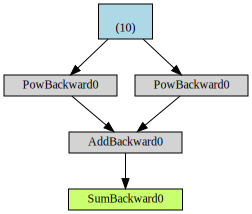

In [15]:
x = torch.ones(10, requires_grad=True)
y = x**2
z = x**3
r = (y + z).sum()
r.backward()
print("x.grad:", x.grad)
make_dot(r)

x.grad: tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


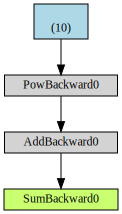

In [16]:
x = torch.ones(10, requires_grad=True)
y = x**2
z = x.detach()**3
r = (y + z).sum()
r.backward()
print("x.grad:", x.grad)
make_dot(r)

## <span id = "last">其他操作</span>

* 对axis = 0,或axis = 1 的理解<br>
    都表示跨越，0跨行，1跨列

In [17]:
a = np.arange(9).reshape(3,3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [18]:
print("0跨行:",a.sum(0))
print("1跨列:",a.sum(1))

0跨行: [ 9 12 15]
1跨列: [ 3 12 21]


In [19]:
print("总和:",a.sum())

总和: 36


* 对函数中\__len__(self)的理解<br>
    重写len方法供调用

In [20]:
class Test():
    def __init__(self, *num):
        self.nums = num
    def __len__(self):
        return len(self.nums)

test = Test("A","B","C")
print(len(test),test.__len__())

3 3


* \*args 和 \*\*kwargs的异同(some code reference Geeks for Geeks)<br>
    都是可变参数的传值，两者都可当正常函数的传值处理<br>
    \*args是不定长的可变参数，而\*\*kwargs使用的是类似于元组的key to value的可变参数

In [21]:
#对于*args
def myFun(*argv): 
    for arg in argv:
        print(arg)
        
myFun('Hello', 'Welcome', 'to', 'HHQ\'utils') 

Hello
Welcome
to
HHQ'utils


In [22]:
#对于**kwargs我分为了两种情况:
#第一种(定义可变参数函数):
def myFun(**kwargs): 
    for  key, value in kwargs.items():
        print("%s == %s"%(key, value))

myFun(first ='Geeks', mid ='for', last='Geeks')

first == Geeks
mid == for
last == Geeks


In [23]:
#第二种(传入可变参数的字典):
def myFun(first_list, last_list):
    print("the first_list is {}, last_list is {}".format(first_list, last_list))

sample = {"first_list":[1,2],"last_list":[3,4]}
myFun(**sample)

the first_list is [1, 2], last_list is [3, 4]


* 提取list中索引值为奇数或者偶数的数<br>
    some_list[start:stop:step]

In [24]:
np.arange(8)[::2]

array([0, 2, 4, 6])

从一个.py文件中引入其中的类使用:<br>
from xx import class_name<br>
使用import xxx<br>
都在__init__()写了东西<br>
### 值得去查查